In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_table('2004-2021.tsv')

display(df.head(5))
display(df.info())


DATA INICIAL  DATA FINAL        REGI√ÉO              ESTADO  \
0   2004-05-09  2004-05-15  CENTRO OESTE    DISTRITO FEDERAL   
1   2004-05-09  2004-05-15  CENTRO OESTE               GOIAS   
2   2004-05-09  2004-05-15  CENTRO OESTE         MATO GROSSO   
3   2004-05-09  2004-05-15  CENTRO OESTE  MATO GROSSO DO SUL   
4   2004-05-09  2004-05-15      NORDESTE             ALAGOAS   

            PRODUTO  N√öMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  \
0  ETANOL HIDRATADO                           127              R$/l   
1  ETANOL HIDRATADO                           387              R$/l   
2  ETANOL HIDRATADO                           192              R$/l   
3  ETANOL HIDRATADO                           162              R$/l   
4  ETANOL HIDRATADO                           103              R$/l   

   PRE√áO M√âDIO REVENDA  DESVIO PADR√ÉO REVENDA  PRE√áO M√çNIMO REVENDA  \
0                1.288                  0.016                  1.19   
1                1.162                  0.114                  0.89   
2                1.389                  0.097                  1.18   
3                1.262                  0.070                  1.09   
4                1.181                  0.078                  1.05   

   PRE√áO M√ÅXIMO REVENDA MARGEM M√âDIA REVENDA  COEF DE VARIA√á√ÉO REVENDA  \
0                 1.350                0.463                     0.012   
1                 1.449                0.399                     0.098   
2                 1.760                0.419                     0.070   
3                 1.509                0.432                     0.055   
4                 1.400                 0.24                     0.066   

  PRE√áO M√âDIO DISTRIBUI√á√ÉO DESVIO PADR√ÉO DISTRIBUI√á√ÉO  \
0                    0.825                       0.11   
1                    0.763                      0.088   
2                     0.97                      0.095   
3                     0.83                      0.119   
4                    0.941                      0.077   

  PRE√áO M√çNIMO DISTRIBUI√á√ÉO PRE√áO M√ÅXIMO DISTRIBUI√á√ÉO  \
0                    0.4201                    0.9666   
1                    0.5013                      1.05   
2                    0.5614                     1.161   
3                    0.5991                   1.22242   
4                    0.7441                    1.0317   

  COEF DE VARIA√á√ÉO DISTRIBUI√á√ÉO  
0                         0.133  
1                         0.115  
2                         0.098  
3                         0.143  
4                         0.082

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGI√ÉO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   N√öMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PRE√áO M√âDIO REVENDA            120823 non-null  float64
 8   DESVIO PADR√ÉO REVENDA          120823 non-null  float64
 9   PRE√áO M√çNIMO REVENDA           120823 non-null  float64
 10  PRE√áO M√ÅXIMO REVENDA           120823 non-null  float64
 11  MARGEM M√âDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIA√á√ÉO R

None

In [3]:
# Converter diretamente com to_numeric primeiro
df['DATA INICIAL'] = pd.to_numeric(df['DATA INICIAL'], errors='coerce')
df['DATA FINAL'] = pd.to_numeric(df['DATA FINAL'], errors='coerce')

# Depois converter para string e preencher com zeros
df['DATA INICIAL'] = df['DATA INICIAL'].apply(lambda x: str(int(x)).zfill(6) if pd.notna(x) else None)
df['DATA FINAL'] = df['DATA FINAL'].apply(lambda x: str(int(x)).zfill(6) if pd.notna(x) else None)

# Finalmente converter para datetime
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'], format='%d%m%y', errors='coerce')
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'], format='%d%m%y', errors='coerce')


# Colunas de distribui√ß√£o que vieram como object mas s√£o n√∫meros
cols_dist = [
    'PRE√áO M√âDIO DISTRIBUI√á√ÉO',
    'DESVIO PADR√ÉO DISTRIBUI√á√ÉO',
    'PRE√áO M√çNIMO DISTRIBUI√á√ÉO',
    'PRE√áO M√ÅXIMO DISTRIBUI√á√ÉO',
    'COEF DE VARIA√á√ÉO DISTRIBUI√á√ÉO',
    'MARGEM M√âDIA REVENDA'
]

for col in cols_dist:
    # Substituir '-' por NaN e depois converter v√≠rgula para ponto
    df[col] = df[col].replace('-', None)  # ou np.nan
    df[col] = df[col].str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.drop(['DATA INICIAL', 'DATA FINAL'], axis=1)


df.info()
display(df.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   REGI√ÉO                         120823 non-null  object 
 1   ESTADO                         120823 non-null  object 
 2   PRODUTO                        120823 non-null  object 
 3   N√öMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 4   UNIDADE DE MEDIDA              120823 non-null  object 
 5   PRE√áO M√âDIO REVENDA            120823 non-null  float64
 6   DESVIO PADR√ÉO REVENDA          120823 non-null  float64
 7   PRE√áO M√çNIMO REVENDA           120823 non-null  float64
 8   PRE√áO M√ÅXIMO REVENDA           120823 non-null  float64
 9   MARGEM M√âDIA REVENDA           117392 non-null  float64
 10  COEF DE VARIA√á√ÉO REVENDA       120823 non-null  float64
 11  PRE√áO M√âDIO DISTRIBUI√á√ÉO       117423 non-null  float64
 12  DESVIO PADR√ÉO

REGI√ÉO              ESTADO           PRODUTO  \
0  CENTRO OESTE    DISTRITO FEDERAL  ETANOL HIDRATADO   
1  CENTRO OESTE               GOIAS  ETANOL HIDRATADO   
2  CENTRO OESTE         MATO GROSSO  ETANOL HIDRATADO   
3  CENTRO OESTE  MATO GROSSO DO SUL  ETANOL HIDRATADO   
4      NORDESTE             ALAGOAS  ETANOL HIDRATADO   

   N√öMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PRE√áO M√âDIO REVENDA  \
0                           127              R$/l                1.288   
1                           387              R$/l                1.162   
2                           192              R$/l                1.389   
3                           162              R$/l                1.262   
4                           103              R$/l                1.181   

   DESVIO PADR√ÉO REVENDA  PRE√áO M√çNIMO REVENDA  PRE√áO M√ÅXIMO REVENDA  \
0                  0.016                  1.19                 1.350   
1                  0.114                  0.89                 1.449   
2                  0.097                  1.18                 1.760   
3                  0.070                  1.09                 1.509   
4                  0.078                  1.05                 1.400   

   MARGEM M√âDIA REVENDA  COEF DE VARIA√á√ÉO REVENDA  PRE√áO M√âDIO DISTRIBUI√á√ÉO  \
0                 0.463                     0.012                     0.825   
1                 0.399                     0.098                     0.763   
2                 0.419                     0.070                     0.970   
3                 0.432                     0.055                     0.830   
4                 0.240                     0.066                     0.941   

   DESVIO PADR√ÉO DISTRIBUI√á√ÉO  PRE√áO M√çNIMO DISTRIBUI√á√ÉO  \
0                       0.110                     0.4201   
1                       0.088                     0.5013   
2                       0.095                     0.5614   
3                       0.119                     0.5991   
4                       0.077                     0.7441   

   PRE√áO M√ÅXIMO DISTRIBUI√á√ÉO  COEF DE VARIA√á√ÉO DISTRIBUI√á√ÉO  
0                    0.96660                          0.133  
1                    1.05000                          0.115  
2                    1.16100                          0.098  
3                    1.22242                          0.143  
4                    1.03170                          0.082

#### üìä ETAPA 2: AN√ÅLISE EXPLORAT√ìRIA INICIAL
**O que investigar:**

##### 2.1 Vis√£o Geral
- Quantos produtos diferentes existem?
- Quantas regi√µes e estados est√£o no dataset?
- Qual o per√≠odo coberto (nome do arquivo sugere 2004-2021)?
- Quantos postos foram pesquisados (m√©dia, min, max)?

##### 2.2 Distribui√ß√£o dos Dados
- Qual produto tem mais registros?
- Qual regi√£o/estado tem mais observa√ß√µes?
- H√° desbalanceamento nos dados?

**Gr√°ficos sugeridos:**
- Contagem de registros por produto (barras)
- Distribui√ß√£o de registros por regi√£o (pizza ou barras)
- N√∫mero de postos pesquisados por estado (mapa de calor ou barras)

---

In [4]:

print("\nPRODUTOS: ")
print(df['PRODUTO'].unique())
print("\n REGIOES: ")
print(df['REGI√ÉO'].unique())


# 2. Distribui√ß√£o por Produto
print("\n Distribui√ß√£o por Produto")
print(df['PRODUTO'].value_counts())


# Quantos postos pesquisados?
print("\nEstat√≠sticas de postos:")
print(df['N√öMERO DE POSTOS PESQUISADOS'].describe())


regiao_estado = df[['ESTADO', 'REGI√ÉO']].value_counts()
display(regiao_estado)



PRODUTOS: 
['ETANOL HIDRATADO' 'GASOLINA COMUM' 'GLP' 'GNV' '√ìLEO DIESEL'
 '√ìLEO DIESEL S10' 'OLEO DIESEL' 'OLEO DIESEL S10' 'GASOLINA ADITIVADA']

 REGIOES: 
['CENTRO OESTE' 'NORDESTE' 'NORTE' 'SUDESTE' 'SUL']

 Distribui√ß√£o por Produto
PRODUTO
GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
√ìLEO DIESEL           21194
GNV                   14469
√ìLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: count, dtype: int64

Estat√≠sticas de postos:
count    120823.000000
mean        221.066461
std         387.940239
min           1.000000
25%          39.000000
50%          99.000000
75%         226.000000
max        4167.000000
Name: N√öMERO DE POSTOS PESQUISADOS, dtype: float64


ESTADO               REGI√ÉO      
BAHIA                NORDESTE        4819
RIO DE JANEIRO       SUDESTE         4819
PARAIBA              NORDESTE        4819
RIO GRANDE DO SUL    SUL             4819
SAO PAULO            SUDESTE         4819
SANTA CATARINA       SUL             4818
RIO GRANDE DO NORTE  NORDESTE        4818
MINAS GERAIS         SUDESTE         4817
ESPIRITO SANTO       SUDESTE         4815
PERNAMBUCO           NORDESTE        4813
CEARA                NORDESTE        4813
PARANA               SUL             4807
ALAGOAS              NORDESTE        4806
SERGIPE              NORDESTE        4795
MATO GROSSO DO SUL   CENTRO OESTE    4793
MATO GROSSO          CENTRO OESTE    4566
AMAZONAS             NORTE           4414
GOIAS                CENTRO OESTE    4134
PIAUI                NORDESTE        4017
MARANHAO             NORDESTE        3971
DISTRITO FEDERAL     CENTRO OESTE    3956
PARA                 NORTE           3955
TOCANTINS            NORTE           3953

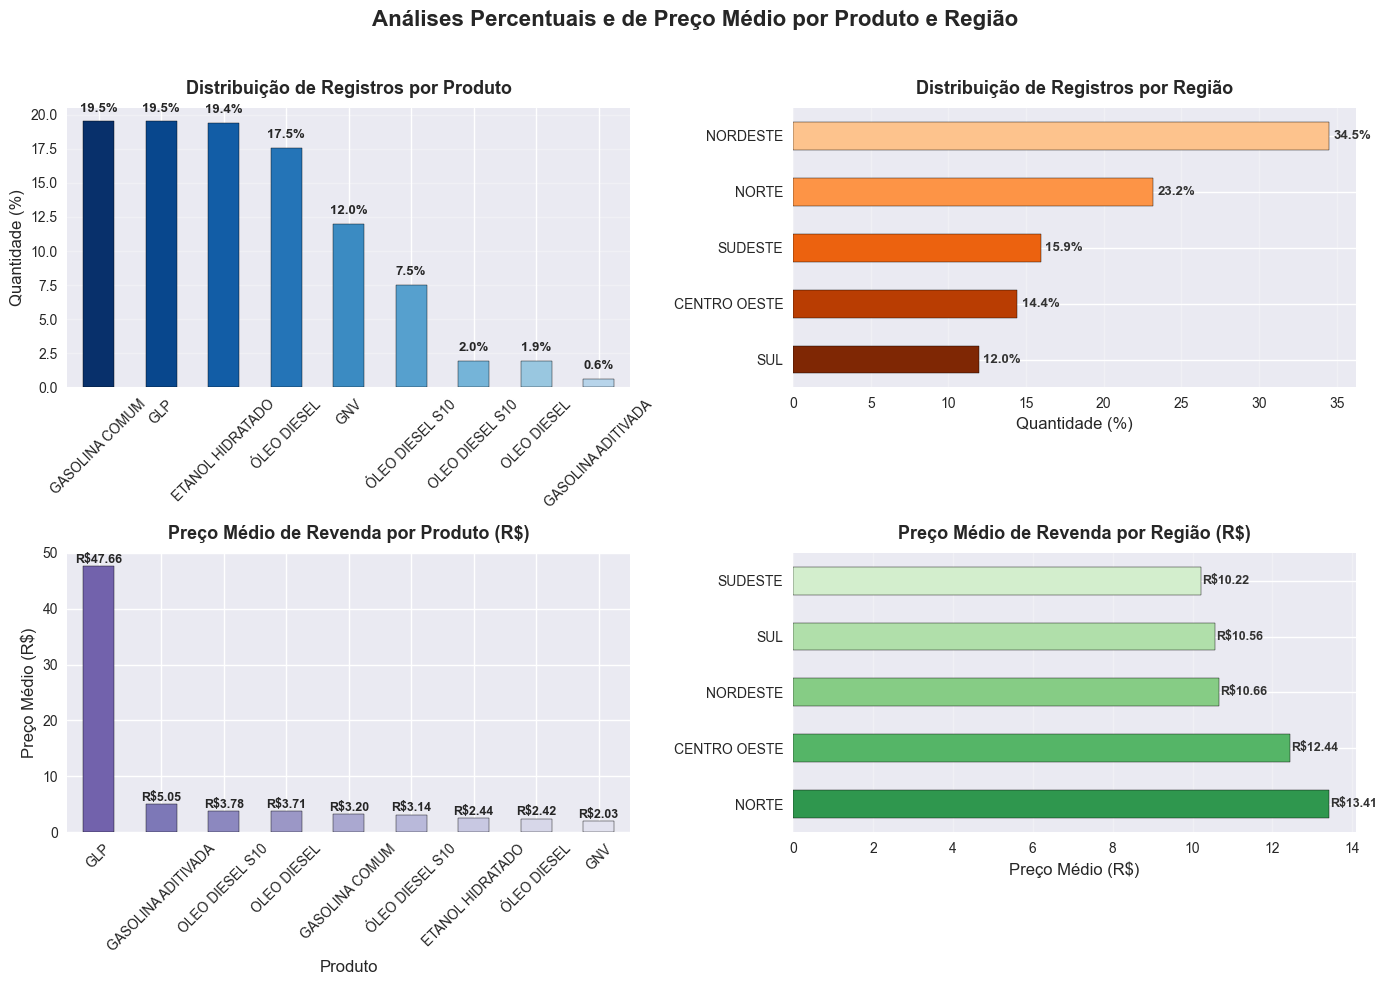

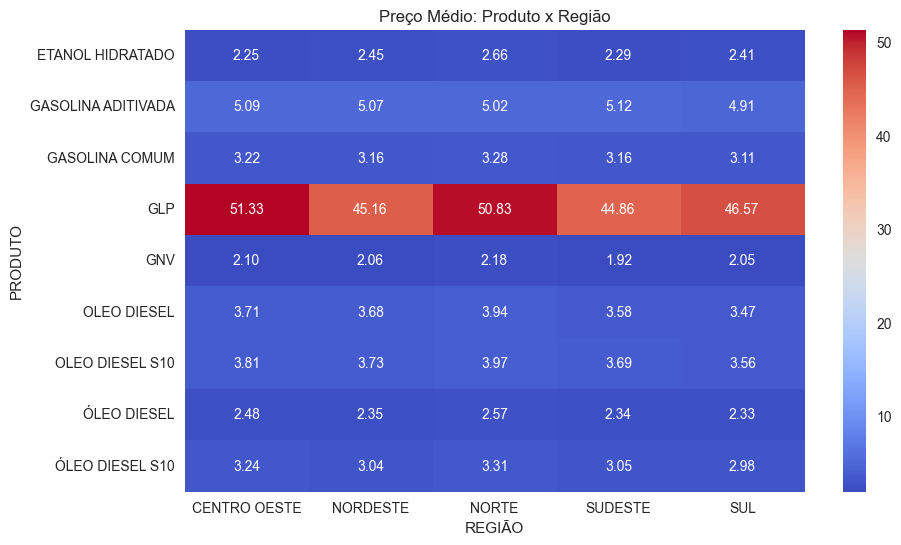

In [5]:

#Grafico de porcentagens de produtos mais destribuidos e de regioes

# ======== C√ÅLCULOS ========
# Porcentagem de registros
porcentagem_produto = df['PRODUTO'].value_counts(normalize=True) * 100
porcentagem_regiao = df['REGI√ÉO'].value_counts(normalize=True) * 100
porcentagem_regiao = porcentagem_regiao.sort_values()

# Tabela cruzada (pivot table)
tabela_preco = df.pivot_table(
    values='PRE√áO M√âDIO REVENDA',
    index='PRODUTO',
    columns='REGI√ÉO',
    aggfunc='mean'
)

# Pre√ßos m√©dios
preco_produto = df.groupby('PRODUTO')['PRE√áO M√âDIO REVENDA'].mean().sort_values(ascending=False)
preco_regiao = df.groupby('REGI√ÉO')['PRE√áO M√âDIO REVENDA'].mean().sort_values(ascending=False)

# ======== ESTILO ========
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle('An√°lises Percentuais e de Pre√ßo M√©dio por Produto e Regi√£o',
             fontsize=16, fontweight='bold', y=0.98)

# Paletas de cores
cores_produto = plt.cm.Blues(np.linspace(1, 0.3, len(porcentagem_produto)))
cores_regiao = plt.cm.Oranges(np.linspace(1, 0.3, len(porcentagem_regiao)))
cores_preco_produto = plt.cm.Purples(np.linspace(0.7, 0.2, len(preco_produto)))
cores_preco_regiao = plt.cm.Greens(np.linspace(0.7, 0.2, len(preco_regiao)))


# ======== GR√ÅFICO 1: Distribui√ß√£o por Produto ========
porcentagem_produto.plot(kind='bar', color=cores_produto, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Distribui√ß√£o de Registros por Produto', fontsize=13, fontweight='bold', pad=10)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Quantidade (%)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

for p in axes[0, 0].patches:
    axes[0, 0].text(p.get_x() + p.get_width()/2, p.get_height() + 0.5,
                    f'{p.get_height():.1f}%', ha='center', va='bottom', fontsize=9.5, fontweight='bold')

axes[0, 0].spines[['right', 'top']].set_visible(False)
axes[0, 0].grid(alpha=0.3, axis='y')


# ======== GR√ÅFICO 2: Distribui√ß√£o por Regi√£o ========
porcentagem_regiao.plot(kind='barh', color=cores_regiao, edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Distribui√ß√£o de Registros por Regi√£o', fontsize=13, fontweight='bold', pad=10)
axes[0, 1].set_xlabel('Quantidade (%)', fontsize=12)
axes[0, 1].set_ylabel('')

for p in axes[0, 1].patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    axes[0, 1].text(width + 0.3, y, f'{width:.1f}%', ha='left', va='center',
                    fontsize=9.5, fontweight='bold', color='#333333')

axes[0, 1].spines[['right', 'top']].set_visible(False)
axes[0, 1].grid(alpha=0.3, axis='x')


# ======== GR√ÅFICO 3: Pre√ßo M√©dio por Produto ========
preco_produto.plot(kind='bar', color=cores_preco_produto, edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Pre√ßo M√©dio de Revenda por Produto (R$)', fontsize=13, fontweight='bold', pad=10)
axes[1, 0].set_xlabel('Produto', fontsize=12)
axes[1, 0].set_ylabel('Pre√ßo M√©dio (R$)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

for p in axes[1, 0].patches:
    axes[1, 0].text(p.get_x() + p.get_width()/2, p.get_height() + 0.02,
                    f'R${p.get_height():.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')



# ======== GR√ÅFICO 4: Pre√ßo M√©dio por Regi√£o ========
preco_regiao.plot(kind='barh', color=cores_preco_regiao, edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Pre√ßo M√©dio de Revenda por Regi√£o (R$)', fontsize=13, fontweight='bold', pad=10)
axes[1, 1].set_xlabel('Pre√ßo M√©dio (R$)', fontsize=12)
axes[1, 1].set_ylabel('')

for p in axes[1, 1].patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    axes[1, 1].text(width + 0.03, y, f'R${width:.2f}', ha='left', va='center',
                    fontsize=9, fontweight='bold', color='#333333')

axes[1, 1].spines[['right', 'top']].set_visible(False)
axes[1, 1].grid(alpha=0.3, axis='x')

# ======== AJUSTES FINAIS ========
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




plt.figure(figsize=(10, 6))
sns.heatmap(tabela_preco, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pre√ßo M√©dio: Produto x Regi√£o')
plt.show()


## üí∞ ETAPA 3: AN√ÅLISE DE PRE√áOS

### 3.1 An√°lise por Produto
**Perguntas:**
- Qual combust√≠vel √© mais caro em m√©dia?
- Qual tem maior varia√ß√£o de pre√ßo?
- Como os pre√ßos se distribuem (histograma)?

**Gr√°ficos:**
- Boxplot de pre√ßos por produto
- Histograma de distribui√ß√£o de pre√ßos
- Barras horizontais com m√©dia de pre√ßo

### 3.2 An√°lise Geogr√°fica
**Perguntas:**
- Qual regi√£o tem o combust√≠vel mais caro?
- Quais os 5 estados mais caros? E os 5 mais baratos?
- H√° diferen√ßa significativa entre regi√µes?

**Gr√°ficos:**
- Mapa de calor (estados x pre√ßo m√©dio)
- Barras por regi√£o
- Gr√°fico de dispers√£o (latitude/longitude se tiver)

### 3.3 Compara√ß√£o Distribui√ß√£o x Revenda
**Perguntas:**
- Qual a diferen√ßa m√©dia entre pre√ßo de distribui√ß√£o e revenda?
- Essa margem varia por regi√£o?
- Essa margem varia por produto?

**Gr√°ficos:**
- Gr√°fico de barras agrupadas (distribui√ß√£o vs revenda)
- Scatterplot (pre√ßo distribui√ß√£o x pre√ßo revenda)
- Heatmap de margem por estado/produto

---